In [1]:
# SVM Classification
import pandas as pd
import numpy as np

from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import seaborn as sns

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
sal_test=pd.read_csv("SalaryData_Test(1).csv",index_col=False)

sal_train=pd.read_csv("SalaryData_Train(1).csv",index_col=False)


In [3]:
frames = [sal_train,sal_test]
  
combinedframes = pd.concat(frames)
display(combinedframes)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [4]:
combinedframes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45221 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            45221 non-null  int64 
 1   workclass      45221 non-null  object
 2   education      45221 non-null  object
 3   educationno    45221 non-null  int64 
 4   maritalstatus  45221 non-null  object
 5   occupation     45221 non-null  object
 6   relationship   45221 non-null  object
 7   race           45221 non-null  object
 8   sex            45221 non-null  object
 9   capitalgain    45221 non-null  int64 
 10  capitalloss    45221 non-null  int64 
 11  hoursperweek   45221 non-null  int64 
 12  native         45221 non-null  object
 13  Salary         45221 non-null  object
dtypes: int64(5), object(9)
memory usage: 5.2+ MB


In [5]:
#Reducing the data by taking the sample from the complete data
df_split = combinedframes.sample(frac=0.1,random_state=200)
df_split.reset_index()

,index,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,10246,49,Local-gov,Assoc-acdm,12,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,<=50K
1,9865,40,Private,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,15024,0,50,United-States,>50K
2,6569,25,Private,Assoc-acdm,12,Never-married,Sales,Not-in-family,White,Male,0,0,48,United-States,<=50K
3,7887,19,Private,Some-college,10,Married-spouse-absent,Sales,Own-child,White,Female,0,1602,40,United-States,<=50K
4,14236,29,Private,HS-grad,9,Never-married,Exec-managerial,Not-in-family,White,Male,0,0,50,Mexico,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4517,19394,29,Private,Some-college,10,Never-married,Other-service,Not-in-family,Black,Female,0,0,30,Jamaica,<=50K
4518,15068,41,Private,Assoc-voc,11,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,<=50K
4519,3356,43,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,44,Mexico,<=50K
4520,3532,37,Private,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,United-States,<=50K


In [ ]:
#sal_test = sal_test.assign(Index=range(len(sal_test))).set_index('Index')

In [6]:
df_split=df_split.drop('education',axis=1) # Droping the column
df_split

,age,workclass,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
10246,49,Local-gov,12,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,<=50K
9865,40,Private,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,15024,0,50,United-States,>50K
6569,25,Private,12,Never-married,Sales,Not-in-family,White,Male,0,0,48,United-States,<=50K
7887,19,Private,10,Married-spouse-absent,Sales,Own-child,White,Female,0,1602,40,United-States,<=50K
14236,29,Private,9,Never-married,Exec-managerial,Not-in-family,White,Male,0,0,50,Mexico,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19394,29,Private,10,Never-married,Other-service,Not-in-family,Black,Female,0,0,30,Jamaica,<=50K
15068,41,Private,11,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,<=50K
3356,43,Private,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,44,Mexico,<=50K
3532,37,Private,13,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,United-States,<=50K


In [7]:
df_split['native']= df_split['native'].astype('category') # will convert column to category
df_split['native']= df_split['native'].cat.codes # Encoding the column
df_split['Salary']= df_split['Salary'].astype('category') # will convert column to category
df_split['Salary']= df_split['Salary'].cat.codes # Encoding the column

df_split['workclass']= df_split['workclass'].astype('category') # will convert column to category
df_split['workclass']= df_split['workclass'].cat.codes # Encoding the column

In [8]:
for i in sal_test.columns[3:9]:
    df_split[i]=df_split[i].astype('category')
    df_split[i]=df_split[i].cat.codes

In [9]:
df_split

,age,workclass,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
10246,49,1,11,2,0,0,4,1,0,0,40,36,0
9865,40,2,13,2,3,0,4,1,15024,0,50,36,1
6569,25,2,11,4,11,1,4,1,0,0,48,36,0
7887,19,2,9,3,11,3,4,0,0,1602,40,36,0
14236,29,2,8,4,3,1,4,1,0,0,50,24,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19394,29,2,9,4,7,1,2,0,0,0,30,21,0
15068,41,2,10,2,3,0,4,1,0,0,40,36,0
3356,43,2,8,2,6,0,4,1,0,0,44,24,0
3532,37,2,12,2,11,0,4,1,0,0,50,36,0


In [10]:
df_split[df_split.duplicated()] # Prints the duplicated rows

,age,workclass,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
24518,39,2,10,2,2,0,4,1,0,0,40,36,0
1925,19,2,8,4,7,3,4,1,0,0,25,36,0
11530,27,2,11,4,11,1,4,1,0,0,40,36,0
5896,53,2,9,2,2,0,4,1,0,0,40,36,0
23651,56,2,9,2,9,0,4,1,0,0,40,36,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
525,24,2,8,4,2,3,4,1,0,0,40,36,0
29522,44,2,8,2,2,0,4,1,0,0,40,36,0
18518,37,2,9,2,2,0,4,1,0,0,40,36,0
7340,45,2,8,2,2,0,4,1,0,0,40,36,0


In [11]:
df_split=df_split.drop_duplicates()

In [12]:
df_split.reset_index()

,index,age,workclass,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,10246,49,1,11,2,0,0,4,1,0,0,40,36,0
1,9865,40,2,13,2,3,0,4,1,15024,0,50,36,1
2,6569,25,2,11,4,11,1,4,1,0,0,48,36,0
3,7887,19,2,9,3,11,3,4,0,0,1602,40,36,0
4,14236,29,2,8,4,3,1,4,1,0,0,50,24,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4401,19394,29,2,9,4,7,1,2,0,0,0,30,21,0
4402,15068,41,2,10,2,3,0,4,1,0,0,40,36,0
4403,3356,43,2,8,2,6,0,4,1,0,0,44,24,0
4404,3532,37,2,12,2,11,0,4,1,0,0,50,36,0


In [13]:
df_split.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4406 entries, 10246 to 20177
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            4406 non-null   int64
 1   workclass      4406 non-null   int8 
 2   educationno    4406 non-null   int8 
 3   maritalstatus  4406 non-null   int8 
 4   occupation     4406 non-null   int8 
 5   relationship   4406 non-null   int8 
 6   race           4406 non-null   int8 
 7   sex            4406 non-null   int8 
 8   capitalgain    4406 non-null   int64
 9   capitalloss    4406 non-null   int64
 10  hoursperweek   4406 non-null   int64
 11  native         4406 non-null   int8 
 12  Salary         4406 non-null   int8 
dtypes: int64(4), int8(9)
memory usage: 210.8 KB


In [14]:
# we can check how much space each column is actually taking
# the numbers are in bytes, not kilobytes
df_split.memory_usage(deep=True)

Index            35248
age              35248
workclass         4406
educationno       4406
maritalstatus     4406
occupation        4406
relationship      4406
race              4406
sex               4406
capitalgain      35248
capitalloss      35248
hoursperweek     35248
native            4406
Salary            4406
dtype: int64

In [15]:
type(df_split.memory_usage(deep=True))

pandas.core.series.Series

In [16]:
df_split.memory_usage(deep=True).sum()

215894

In [17]:
#Changing int type to int8 to reduce the memory size
df_split['age']=df_split['age'].astype('int8')
df_split['hoursperweek']=df_split['hoursperweek'].astype('int8')
df_split['capitalgain']=df_split['capitalgain'].astype('int32')
df_split['capitalloss']=df_split['capitalloss'].astype('int16')

In [18]:
df_split.memory_usage(deep=True).sum()

110150

In [19]:
df_split.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4406 entries, 10246 to 20177
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            4406 non-null   int8 
 1   workclass      4406 non-null   int8 
 2   educationno    4406 non-null   int8 
 3   maritalstatus  4406 non-null   int8 
 4   occupation     4406 non-null   int8 
 5   relationship   4406 non-null   int8 
 6   race           4406 non-null   int8 
 7   sex            4406 non-null   int8 
 8   capitalgain    4406 non-null   int32
 9   capitalloss    4406 non-null   int16
 10  hoursperweek   4406 non-null   int8 
 11  native         4406 non-null   int8 
 12  Salary         4406 non-null   int8 
dtypes: int16(1), int32(1), int8(11)
memory usage: 107.6 KB


<AxesSubplot:>

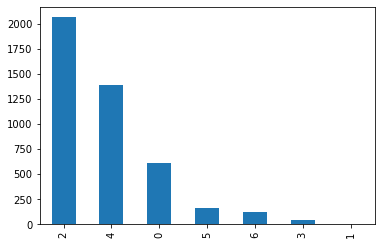

In [20]:
df_split.maritalstatus.value_counts().plot(kind='bar')

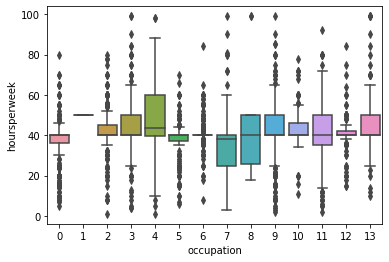

In [21]:
sns.boxplot(x='occupation', y='hoursperweek',data=df_split);

<AxesSubplot:>

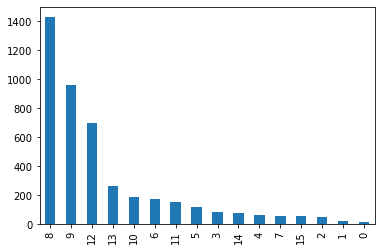

In [22]:
df_split.educationno.value_counts().plot(kind='bar')

In [23]:
df_split.occupation.value_counts()

9     590
3     564
11    556
2     551
0     546
7     441
6     300
13    234
5     204
12    160
4     136
10    104
8      19
1       1
Name: occupation, dtype: int64

<AxesSubplot:>

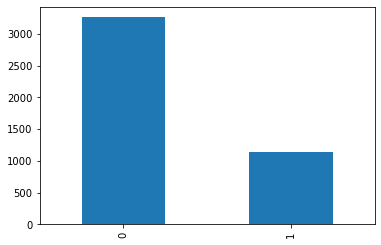

In [24]:
df_split.Salary.value_counts().plot(kind='bar')

<AxesSubplot:xlabel='Salary', ylabel='educationno'>

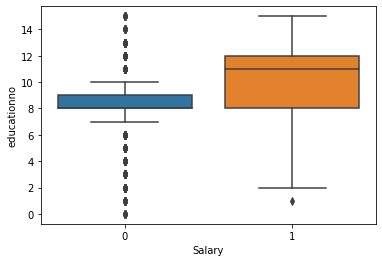

In [25]:
sns.boxplot(df_split.Salary,df_split.educationno)

In [26]:
md=df_split.median()
md

age              37.0
workclass         2.0
educationno       9.0
maritalstatus     2.0
occupation        6.0
relationship      1.0
race              4.0
sex               1.0
capitalgain       0.0
capitalloss       0.0
hoursperweek     40.0
native           36.0
Salary            0.0
dtype: float64

In [27]:
from sklearn.ensemble import IsolationForest

In [28]:
# training the model
clf = IsolationForest(random_state=10,contamination=.01)
clf.fit(df_split)

IsolationForest(contamination=0.01, random_state=10)

In [29]:
# predictions
y_pred_outliers = clf.predict(df_split)

In [30]:
#-1 for outliers and 1 for inliers.
y_pred_outliers

array([1, 1, 1, ..., 1, 1, 1])

In [31]:
df_split['Outliers']=y_pred_outliers

In [32]:
df_split['Outliers'].value_counts()

 1    4361
-1      45
Name: Outliers, dtype: int64

In [33]:
df_split.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4406 entries, 10246 to 20177
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            4406 non-null   int8 
 1   workclass      4406 non-null   int8 
 2   educationno    4406 non-null   int8 
 3   maritalstatus  4406 non-null   int8 
 4   occupation     4406 non-null   int8 
 5   relationship   4406 non-null   int8 
 6   race           4406 non-null   int8 
 7   sex            4406 non-null   int8 
 8   capitalgain    4406 non-null   int32
 9   capitalloss    4406 non-null   int16
 10  hoursperweek   4406 non-null   int8 
 11  native         4406 non-null   int8 
 12  Salary         4406 non-null   int8 
 13  Outliers       4406 non-null   int32
dtypes: int16(1), int32(2), int8(11)
memory usage: 253.8 KB


Text(0.5, 0, 'hoursperweek')

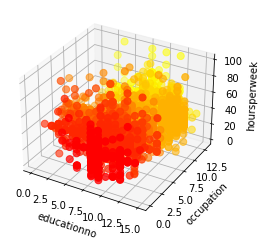

In [34]:
ax = plt.subplot(projection='3d')
ax.scatter3D(df_split.educationno, df_split.occupation,df_split.hoursperweek , c=df_split.occupation, s=50, cmap='autumn')
ax.set_xlabel('educationno')
ax.set_ylabel('occupation')
ax.set_zlabel('hoursperweek')

Text(0.5, 1.0, 'Capital Gain')

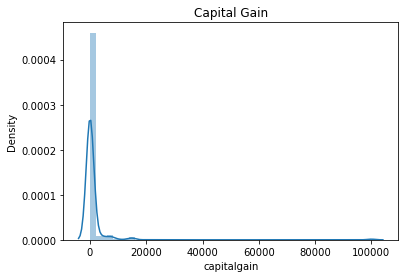

In [35]:
sns.distplot(df_split.capitalgain)
plt.title("Capital Gain")

Text(0.5, 1.0, 'Capital Loss')

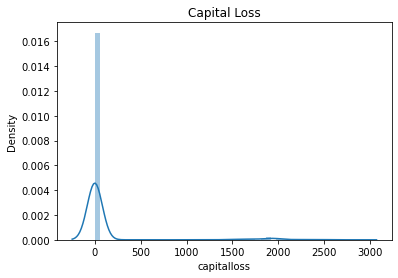

In [36]:
sns.distplot(df_split.capitalloss)
plt.title("Capital Loss")

In [37]:
df_split.describe()

,age,workclass,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary,Outliers
count,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.00000,4406.000000,4406.000000,4406.000000,4406.000000
mean,38.639809,2.211076,9.088289,2.584657,6.088516,1.401725,3.674535,0.682025,1066.975034,105.91035,41.014753,34.519746,0.259873,0.979573
std,13.260212,0.971290,2.590766,1.505037,4.068189,1.590048,0.840151,0.465743,7295.338801,440.49652,11.920490,5.635339,0.438614,0.201110
min,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,-1.000000
25%,28.000000,2.000000,8.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.00000,40.000000,36.000000,0.000000,1.000000
50%,37.000000,2.000000,9.000000,2.000000,6.000000,1.000000,4.000000,1.000000,0.000000,0.00000,40.000000,36.000000,0.000000,1.000000
75%,48.000000,2.000000,11.000000,4.000000,9.000000,3.000000,4.000000,1.000000,0.000000,0.00000,45.000000,36.000000,1.000000,1.000000
max,90.000000,6.000000,15.000000,6.000000,13.000000,5.000000,4.000000,1.000000,99999.000000,2824.00000,99.000000,38.000000,1.000000,1.000000


In [38]:
# replacing outliers with the median
df_split.mask(cond=(df_split.Outliers==-1), other=md, axis=1, inplace=True)

In [39]:
df_split.head(10)

,age,workclass,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary,Outliers
10246,49,1,11,2,0,0,4,1,0,0,40,36,0,1.0
9865,40,2,13,2,3,0,4,1,15024,0,50,36,1,1.0
6569,25,2,11,4,11,1,4,1,0,0,48,36,0,1.0
7887,19,2,9,3,11,3,4,0,0,1602,40,36,0,1.0
14236,29,2,8,4,3,1,4,1,0,0,50,24,0,1.0
23793,22,2,7,2,13,0,4,1,0,0,40,36,0,1.0
4334,29,2,8,4,0,4,4,1,0,0,35,24,0,1.0
30074,48,3,8,2,2,0,4,1,7298,0,50,36,1,1.0
14772,33,0,8,4,0,3,4,0,0,0,30,36,0,1.0
22124,19,2,3,2,5,3,4,1,0,0,45,24,0,1.0


In [40]:
df_split=df_split.drop('Outliers',axis=1)

In [41]:
df_split.describe()

,age,workclass,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
count,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000
mean,38.483205,2.204948,9.073082,2.574898,6.080118,1.388107,3.684975,0.687699,852.288470,97.110758,41.041761,34.628234,0.252610
std,13.105044,0.959324,2.561058,1.490095,4.047861,1.576382,0.827005,0.463485,5903.346426,421.219274,11.769546,5.356932,0.434558
min,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,2.000000,8.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,36.000000,0.000000
50%,37.000000,2.000000,9.000000,2.000000,6.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,36.000000,0.000000
75%,47.000000,2.000000,11.000000,4.000000,9.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,36.000000,1.000000
max,90.000000,6.000000,15.000000,6.000000,13.000000,5.000000,4.000000,1.000000,99999.000000,2824.000000,99.000000,38.000000,1.000000


In [42]:
df_split.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4406 entries, 10246 to 20177
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            4406 non-null   int8 
 1   workclass      4406 non-null   int8 
 2   educationno    4406 non-null   int8 
 3   maritalstatus  4406 non-null   int8 
 4   occupation     4406 non-null   int8 
 5   relationship   4406 non-null   int8 
 6   race           4406 non-null   int8 
 7   sex            4406 non-null   int8 
 8   capitalgain    4406 non-null   int32
 9   capitalloss    4406 non-null   int16
 10  hoursperweek   4406 non-null   int8 
 11  native         4406 non-null   int8 
 12  Salary         4406 non-null   int8 
dtypes: int16(1), int32(1), int8(11)
memory usage: 236.6 KB


In [43]:
array = df_split.values
X = array[:,0:12]
Y = array[:,12]

In [44]:
df_split.head()

,age,workclass,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
10246,49,1,11,2,0,0,4,1,0,0,40,36,0
9865,40,2,13,2,3,0,4,1,15024,0,50,36,1
6569,25,2,11,4,11,1,4,1,0,0,48,36,0
7887,19,2,9,3,11,3,4,0,0,1602,40,36,0
14236,29,2,8,4,3,1,4,1,0,0,50,24,0


In [45]:
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2,f_regression

In [46]:
## Feature Extraction
model=SelectKBest(score_func=chi2,k=3)
fit_model=model.fit(X,Y)
##Summarize scores
set_printoptions(precision=3)
print(fit_model.scores_)
features=fit_model.transform(X)
names=['age','workclass','educationno','maritalstatus','occupation','relationship','race','sex','capitalgain','capitalloss','hoursperweek','native','Salary']

[1.160e+03 9.196e-03 3.395e+02 1.366e+02 7.694e+01 6.390e+02 7.109e+00
 7.975e+01 7.439e+06 1.900e+05 8.766e+02 2.915e+00]


In [47]:
scores=pd.Series(data=fit_model.scores_,index=names[:-1])
scores

age              1.159782e+03
workclass        9.195757e-03
educationno      3.394695e+02
maritalstatus    1.365744e+02
occupation       7.694426e+01
relationship     6.389748e+02
race             7.109349e+00
sex              7.974937e+01
capitalgain      7.439490e+06
capitalloss      1.899664e+05
hoursperweek     8.765744e+02
native           2.915077e+00
dtype: float64

In [48]:
scores.sort_values(ascending=False)

capitalgain      7.439490e+06
capitalloss      1.899664e+05
age              1.159782e+03
hoursperweek     8.765744e+02
relationship     6.389748e+02
educationno      3.394695e+02
maritalstatus    1.365744e+02
sex              7.974937e+01
occupation       7.694426e+01
race             7.109349e+00
native           2.915077e+00
workclass        9.195757e-03
dtype: float64

In [49]:
features=model.get_support() # it tells which are the good features
features

array([ True, False, False, False, False, False, False, False,  True,
        True, False, False])

In [50]:
influencial_features=['capitalgain','capitalloss','age','hoursperweek','occupation','race']

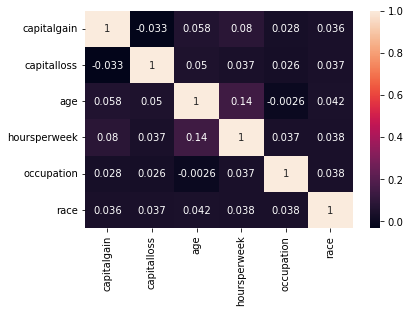

In [51]:
sns.heatmap(df_split[influencial_features].corr(),annot=True);

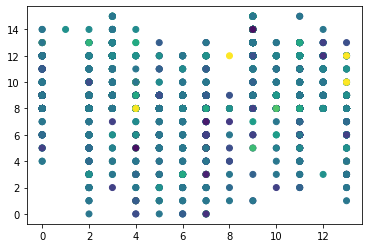

In [52]:
import matplotlib.pyplot as plt
plt.scatter(df_split["occupation"],df_split["educationno"],c=df_split["hoursperweek"])

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2,random_state=15)

In [54]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((3524, 12), (3524,), (882, 12), (882,))

## Grid Search cv

In [55]:
# Taking test data to check the model as the data is large
clf = SVC()
param_grid = [{'kernel':['rbf'],'gamma':[50,5,10,0.5],'C':[15,14,13,12,11,10,0.1,0.001] }]
gsv = GridSearchCV(clf,param_grid,cv=10)
gsv.fit(X_train,y_train)


GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [15, 14, 13, 12, 11, 10, 0.1, 0.001],
                          'gamma': [50, 5, 10, 0.5], 'kernel': ['rbf']}])

In [56]:
gsv.best_params_ , gsv.best_score_ 

({'C': 15, 'gamma': 0.5, 'kernel': 'rbf'}, 0.754827935874324)

In [57]:
clf = SVC(C= 15, gamma = 50)
clf.fit(X_train , y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred)

Accuracy = 74.94331065759637


array([[661,   9],
       [212,   0]], dtype=int64)

In [58]:
clf = SVC(kernel= "linear") 
clf.fit(X_train , y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred)   


Accuracy = 81.06575963718821


array([[602,  68],
       [ 99, 113]], dtype=int64)

## From the above analysis, we can understand that the data is linearly separable, hence linear kernel gives us a better result.
